## <center> Data Visualization </center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly as py

import warnings

warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df_train = pd.read_csv('train.csv', sep=';')
df_test = pd.read_csv('test.csv', sep=';')
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,USER_ID,ACT_DATE,STATUS,TP_CURRENT,TP_CHANGES_NUM,START_PACK,OFFER_GROUP,BIRTHDAY,GENDER,MLLS_STATE,PORTED_IN,PORTED_OUT,OBLIG_NUM,OBLIG_ON_START,ASSET_TYPE_LAST,DEVICE_TYPE_BUS,USAGE_AREA,REFILL_OCT_16,REFILL_NOV_16,OUTGOING_OCT_16,OUTGOING_NOV_16,GPRS_OCT_16,GPRS_NOV_16,REVENUE_OCT_16,REVENUE_NOV_16,ACTIVITY_DEC_16
0,6925431,2012-06-21,D,TP_STATE,0.0,NaN,NaN,1988-04-12,M,NaN,False,False,NaN,False,NaN,Undefined,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0
1,8027797,2013-11-05,D,TP_DL012,20.0,Commercial,Standard,1984-01-02,M,Active,False,False,NaN,False,NaN,Smartphone,Minsk,150000.0,90000.0,337.433333,821.266667,2319.0,2896.0,14.171355,9.75,1.0
2,23498773,2015-07-17,D,TP_L,0.0,Commercial,Promo,1996-09-09,M,Active,False,False,NaN,False,NaN,Smartphone,Minsk,180000.0,100000.0,396.033333,145.466667,80369.0,15803.0,16.170000,10.74,1.0
3,7039091,2012-08-02,D,TP_DL012,1.0,Commercial,Standard,NaN,M,NaN,False,False,NaN,False,NaN,Smartphone,Regional Cities,100000.0,80000.0,234.900000,306.283333,1155.0,1695.0,8.780000,9.42,1.0
4,7510978,2013-03-06,D,TP_ANDR,0.0,NaN,NaN,1991-03-16,F,Active,False,False,NaN,False,Smartphone,Undefined,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0


### Preparing data

In [ ]:
df['ACT_DATE'] = pd.to_datetime(df['ACT_DATE'])
df['BIRTHDAY'] = pd.to_datetime(df['BIRTHDAY'])

# As follows from the description, nans in some columns can be replaced with 0
df.OBLIG_NUM.fillna(0, inplace=True)
df.OUTGOING_OCT_16.fillna(0, inplace=True)
df.OUTGOING_NOV_16.fillna(0, inplace=True)
df.GPRS_OCT_16.fillna(0, inplace=True)
df.GPRS_NOV_16.fillna(0, inplace=True)
df.REVENUE_OCT_16.fillna(0, inplace=True)
df.REVENUE_NOV_16.fillna(0, inplace=True)
# For uniformity, convert all prices in old rubles into new rubles
df['REFILL_OCT_16'] = df['REFILL_OCT_16'] / 1e4
df['REFILL_NOV_16'] = df['REFILL_NOV_16'] / 1e4
df = df.sort_values(by='ACT_DATE')

In [ ]:
def calculate_age(born, current=pd.to_datetime('2016-10-01')):
    was_brthday_this_year = (current.month, current.day) > (born.month, born.day)
    return current.year - born.year + was_brthday_this_year

df['age'] = df.BIRTHDAY.map(calculate_age)

## <center> Matplotlib </center>

### 1. Minutes & Internet Traffic usage by age 

In [ ]:
means_internet = df.groupby('age').GPRS_OCT_16.mean().sort_index()
means_minutes = df.groupby('age').OUTGOING_OCT_16.mean().sort_index()

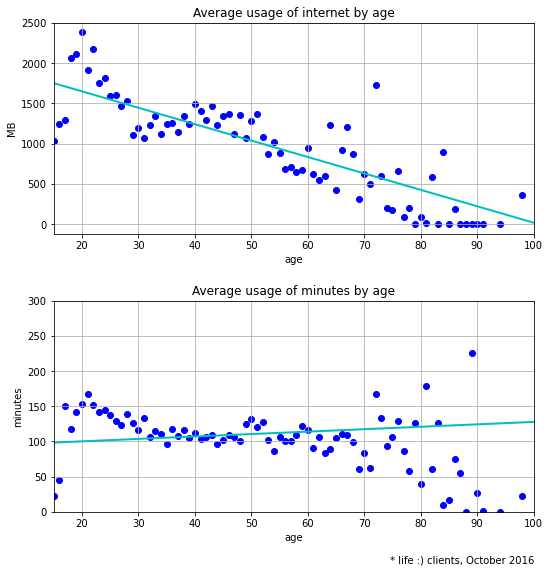

In [ ]:
fig, axes = plt.subplots(figsize=(8,8), nrows=2, ncols=1)

axes[0].scatter(means_internet.index, means_internet.values, alpha=1, c='b')
axes[0].set_xlim([15, 100])
axes[0].set_title('Average usage of internet by age')
axes[0].set_xlabel('age')
axes[0].set_ylabel('MB')
w1, b = np.polyfit(means_internet.index, means_internet.values, 1)
x = np.array([15, 100])
axes[0].plot(x, w1*x + b, lw=2, c='c')
axes[0].grid()

axes[1].scatter(means_minutes.index, means_minutes.values, alpha=1, c='b')
axes[1].set_xlim([15, 100])
axes[1].set_title('Average usage of minutes by age')
axes[1].set_ylim([0, 300])
axes[1].set_xlabel('age')
axes[1].set_ylabel('minutes')
w1, b = np.polyfit(means_minutes.index, means_minutes, 1)
axes[1].plot(x, w1*x + b, lw=2, c='c')
axes[1].grid()

plt.gcf().text(0.7, 0., '* life :) clients, October 2016')
fig.tight_layout(pad=2.0)

As we can see from plots above, with increasing age the average Internet use decreases noticeably, but the use of minutes of people of different ages does not differ so much.

### 2. Distribution by regions

Text(0.5, 1.0, 'Distribution of clients by regions')

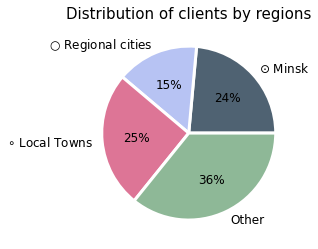

In [ ]:
regions = df.groupby('USAGE_AREA').USAGE_AREA.count()
regions['Other'] = regions['Mix'] + regions['Undefined'] + regions['Countryside']
del regions['Mix'], regions['Undefined'], regions['Countryside']

regs = ['Minsk', 'Regional Cities', 'Local Towns', 'Other']
labels = [r'$\odot $ Minsk', r'$\bigcirc$ Regional cities', r'$\circ$ Local Towns', 'Other']
colors = ['#4F6272', '#B7C3F3', '#DD7596','#8EB897']

plt.pie(regions[regs], labels=labels, autopct='%1.f%%', colors=colors, 
        wedgeprops = {'linewidth':3, 'edgecolor':'white'}, textprops={'fontsize': 12})
plt.title('Distribution of clients by regions', {'fontsize':15})

Thus, a significant part of clients is concentrated in Minsk

### 3.  Clients who don't use Internet

In [ ]:
zero_internet = df[df.GPRS_OCT_16 == 0].shape[0] / df.shape[0]
zero_internet

0.588603479109088

About 59% clients didn't use Internet in October 2016 at all. 
Let's find out who these people are.

In [ ]:
# Consider only clients with any activity
df_ = df[df.OUTGOING_OCT_16 > 0]

no_internet = df_[df_.GPRS_OCT_16 == 0].groupby('USAGE_AREA').GPRS_OCT_16.count()
all_ = df_.groupby('USAGE_AREA').GPRS_OCT_16.count()
no_internet_percentage = no_internet / all_
threshold = df_[df_.GPRS_OCT_16 == 0.0].GPRS_OCT_16.count() / df_.GPRS_OCT_16.count()

Text(0.15, 0.7, 'Mean value by country')

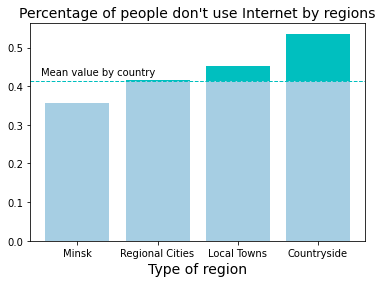

In [ ]:
regions = ['Minsk', 'Regional Cities', 'Local Towns', 'Countryside']
values = no_internet_percentage[regions]

above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

fig, ax = plt.subplots()
ax.bar(regions, below_threshold)
ax.bar(regions, above_threshold, bottom=below_threshold, color='c')
# ax.plot([0., 3.6], [threshold, threshold], "k--")
plt.axhline(y=threshold, linewidth=1, ls='--', c='c')
ax.set_title("Percentage of people don't use Internet by regions", {'fontsize':14})
ax.set_xlabel('Type of region', {'fontsize':14})
plt.gcf().text(0.15, 0.7, 'Mean value by country')

As expected, the smaller the region, the greater  percentage of people do not use the Internet.

### 4. Luring customers

Sometimes customers choose an operator based on advantageous offers, discounts or  opportunity to profitably purchase equipment.
Let's look how often clients are interested in these bonuses.

In [ ]:
from matplotlib_venn import venn2

Text(0.5, 1.0, 'Ways of luring customers')

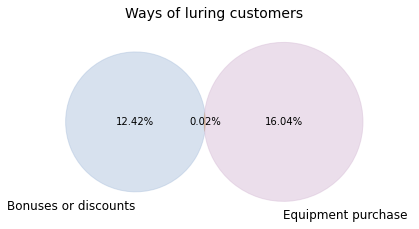

In [ ]:
all_ = len(df)
promos = len(df[df.START_PACK == 'Promo'])
obligs = len(df[df.OBLIG_ON_START])
promos_and_obligs = len(df[(df.START_PACK == 'Promo') & (df.OBLIG_ON_START)])

v = venn2(subsets=(promos, obligs, promos_and_obligs), 
          set_labels=('Bonuses or discounts', 'Equipment purchase '))

v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('lightsteelblue')
v.get_label_by_id('10').set_text(f'{round(promos / all_ * 100, 2)}%')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('thistle')
v.get_label_by_id('01').set_text(f'{round(obligs / all_ * 100, 2)}%')
v.get_label_by_id('11').set_text(f'{round(promos_and_obligs / all_ * 100, 2)}%')

plt.title('Ways of luring customers', {'fontsize': 14})

it can be assumed that about 30 percent of customers have chosen the operator due to its promotions.

### 5. Quartiles of clients revenue by their most used devices

In [ ]:
def first_quartile(arr):
    return np.quantile(a=arr, q=0.25)
def second_quartile(arr):
    return np.quantile(a=arr, q=0.5)
def third_quartile(arr):
    return np.quantile(a=arr, q=0.75)

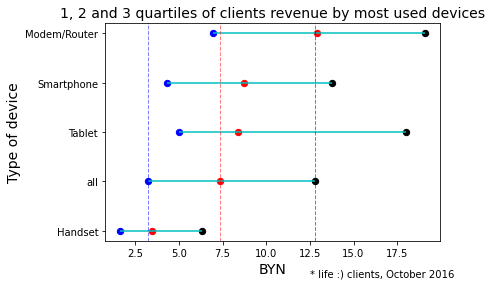

In [ ]:
# Only active clients
df_ = df[df.REVENUE_OCT_16 > 0]
devices_stats = df_.groupby('DEVICE_TYPE_BUS').agg({'REVENUE_OCT_16' : first_quartile})
devices_stats = devices_stats.rename(columns={'REVENUE_OCT_16': '1'})
devices_stats['2'] = df_.groupby('DEVICE_TYPE_BUS').agg({'REVENUE_OCT_16' : second_quartile})
devices_stats['3'] = df_.groupby('DEVICE_TYPE_BUS').agg({'REVENUE_OCT_16' : third_quartile})
all_ = pd.DataFrame({'1' : first_quartile(df_.REVENUE_OCT_16), 
                     '2' : second_quartile(df_.REVENUE_OCT_16), 
                     '3' : third_quartile(df_.REVENUE_OCT_16)}, index = ['all'])
devices_stats = pd.concat([devices_stats, all_])
devices_stats = devices_stats.drop(['Other', 'Undefined'])
devices_stats = devices_stats.sort_values(by='2')

range_ = range(1, 6)
cols = ['b', 'r', 'k']
plt.hlines(y=range_, xmin=devices_stats.iloc[:,0], xmax=devices_stats.iloc[:,2], color='c')
for i in range(3):
    plt.scatter(devices_stats.iloc[:,i], range_, color=cols[i], alpha=1, s=40)
devices_stats.index
plt.yticks(range_, list(devices_stats.index))
for i in range(1, 4):
    plt.axvline(x=all_.loc['all', str(i)], linewidth=1, ls='--', c=cols[i-1], alpha=0.5)
plt.title('1, 2 and 3 quartiles of clients revenue by most used devices', {'fontsize':14})
plt.xlabel('BYN', {'fontsize':14})
plt.ylabel('Type of device', {'fontsize':14})
plt.gcf().text(0.6, 0., '* life :) clients, October 2016')

plt.show()

Clients pay 7,5 BYN a month by median, but it should be concerned that the value depends on the most frequently used device. 

## <center> Seaborn </center>

### 1. Number of new clients

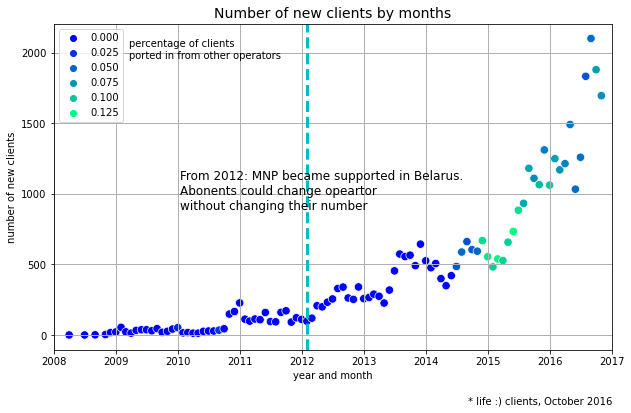

In [ ]:
# in 2012 in Belarus appeared possibility  ... started porting
# life проводил рекламные компании 

df['year_month'] = df.ACT_DATE.map(
    lambda date: pd.to_datetime(str(date.year)+'-'+str(date.month)))

counts = df.groupby(df.year_month).age.count()
counts_ported = df.groupby(df.year_month).PORTED_IN.sum()

perc_ported = counts_ported / counts

plt.figure(figsize=(10, 6))
sns.scatterplot(x=counts.index, y=counts.values, hue=perc_ported, s=70, 
                palette='winter', alpha=1)
# ax.set_xticks([pd.to_datetime(f'{y}').year for y in range(2008, 2017)])
plt.xlim((pd.to_datetime('2008'), pd.to_datetime('2017')))
plt.title('Number of new clients by months', {'fontsize':14})
plt.xlabel('year and month')
plt.ylabel('number of new clients')
plt.grid(lw=1)
# plt.colorbar(label="clients came from other operators")

plt.axvline(x=pd.to_datetime('2012-02'), linewidth=1, c='c', lw=3, ls='--')
plt.gcf().text(0.23, 0.8, 'percentage of clients \nported in from other operators')
plt.gcf().text(0.3, 0.45, 'From 2012: MNP became supported in Belarus.\
               \nAbonents could change opeartor \nwithout changing their number', size=12)
plt.gcf().text(0.7, 0., '* life :) clients, October 2016')

plt.show()

In general, the number of customers was increasing. In 2015 many clients of other operators switched to life :), but in 2016 there were fewer of such clients.

### 2. Tariffs group

Now we are interested in tariff group TP_XS - TP_XL. Often in such tariff lines, with an increase of the package, the operator offers a larger number of megabytes and minutes included. Let's look at real use of included traffic by clients with XS - XL packages.

In [ ]:
tarifs = ['TP_XS', 'TP_S', 'TP_M', 'TP_L', 'TP_XL']
outgoings = df[df.TP_CURRENT.isin(tarif_group)].groupby('TP_CURRENT').OUTGOING_OCT_16.mean()
mbs = df[df.TP_CURRENT.isin(tarif_group)].groupby('TP_CURRENT').GPRS_OCT_16.mean()

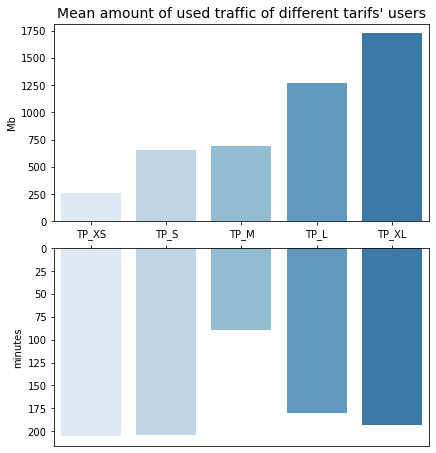

In [ ]:
fix, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

sns.set_palette('Blues')

sns.barplot(x=tarifs, y=mbs[tarifs], ax=axes[0])
axes[0].set(ylabel='Mb')
sns.barplot(x=tarifs, y=outgoings[tarifs], ax=axes[1])
axes[1].set(ylabel='minutes')
axes[1].tick_params(bottom=False, labelbottom=False, top=True)
axes[1].invert_yaxis()
plt.tight_layout(pad=0.5)
axes[0].set_title("Mean amount of used traffic of different tarifs' users", {'fontsize':14})

plt.show()

As we can see, when people choose a package, they usually look for certain amount of internet traffic, and they most likely don't want to pay for extra minutes coming with a larger package.

### 3. Traffic & pay

Text(0, 0.5, 'Refill, BYN')

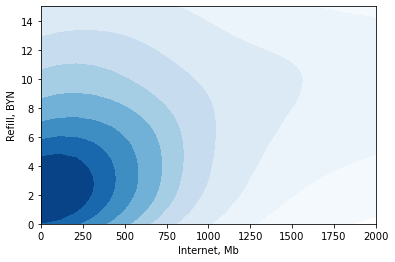

In [ ]:
df_ = df[(df.OUTGOING_OCT_16 > 0) | (df.GPRS_OCT_16 > 0)]
sns.kdeplot(x=df_.GPRS_OCT_16.loc[:5000], y=df_.REFILL_OCT_16[:5000], shade=True, cmap="Blues")
plt.xlim((0, 2000))
plt.ylim((0, 15))
plt.xlabel('Internet, Mb')
plt.ylabel('Refill, BYN')

### 4. Optimal tariff for client

In [ ]:
counts = df.groupby('TP_CURRENT').age.count()
popular_tariffs = list((counts[counts > 1200]).index)
means = df.groupby('TP_CURRENT').agg({'OUTGOING_OCT_16':np.mean, 'GPRS_OCT_16':np.mean, 'REVENUE_OCT_16':np.mean})
means = means.loc[popular_tariffs]
means['OUTGOING_OCT_16'] = means.OUTGOING_OCT_16
grsp_max = means.GPRS_OCT_16.max()
revenue_max = means.REVENUE_OCT_16.max()
means['GPRS_OCT_16'] = means.GPRS_OCT_16 / grsp_max * means.OUTGOING_OCT_16.max()
means['REVENUE_OCT_16'] = means.REVENUE_OCT_16 / revenue_max * means.OUTGOING_OCT_16.max()

Text(0.5, 1.0, 'Mean minutes, internet and cost characteristics of most popular tariffs')

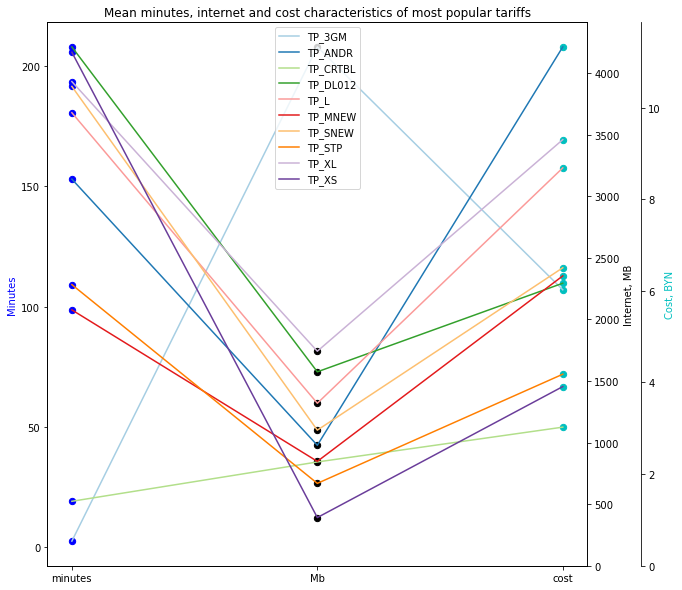

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.subplots_adjust(right=0.75)

sns.set_palette('Paired')
for i in range(len(means)):
    sns.lineplot(x=means.columns, y=means.iloc[i].values, axes=ax, label=means.index[i])
twin1 = ax.twinx()
twin2 = ax.twinx()
twin1.spines['right'].set_position(("axes", 1.0))
twin2.spines['right'].set_position(("axes", 1.1))
twin1.set_ylim(0, grsp_max)
twin2.set_ylim(0, revenue_max)
twin1.set_ylabel('Internet, MB')
twin2.set_ylabel('Cost, BYN')
twin1.yaxis.label.set_color('k')
twin2.yaxis.label.set_color('c')
ax.yaxis.label.set_color('b')
ax.set_ylabel('Minutes')      
ax.set_xticklabels(labels=['minutes', 'Mb', 'cost'])    
ax.scatter(x=['OUTGOING_OCT_16' for _ in range(len(means))], y=means.OUTGOING_OCT_16, color='b', alpha=1, s=40)
ax.scatter(x=['GPRS_OCT_16' for _ in range(len(means))], y=means.GPRS_OCT_16, color='k', alpha=1, s=40)
ax.scatter(x=['REVENUE_OCT_16' for _ in range(len(means))], y=means.REVENUE_OCT_16, color='c', alpha=1, s=40)
plt.title('Mean minutes, internet and cost characteristics of most popular tariffs')
# design is so bad, i'm sorry :c

For example, if I need >200 minutes a month but almost no internet, the best (cheapest) tariff will probably be TP_XS.